# Case Study of diabetes patients using ANN

In [1]:
#Import the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb

In [2]:
#Import the dataset
data=pd.read_csv('C:/Users/aksha/Desktop/ai/datasets/diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.shape

(768, 9)

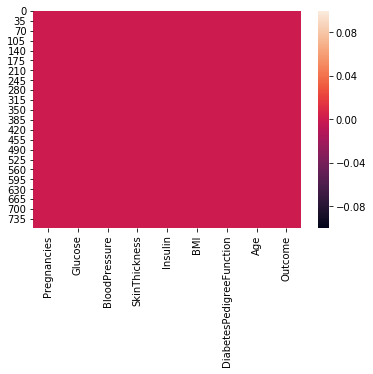

In [4]:
sb.heatmap(data.isnull())

Outcome
0    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
1    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
dtype: object

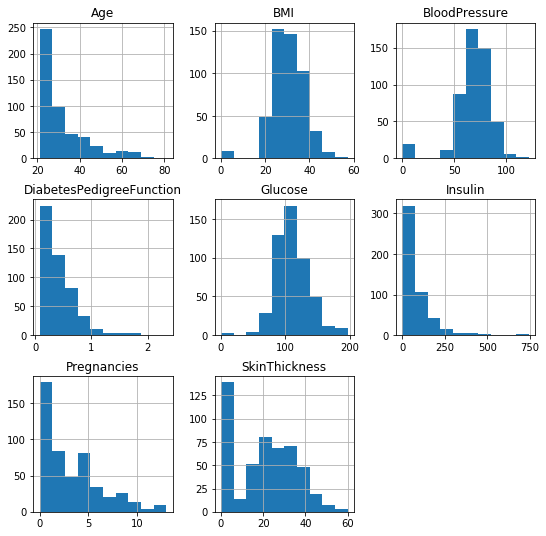

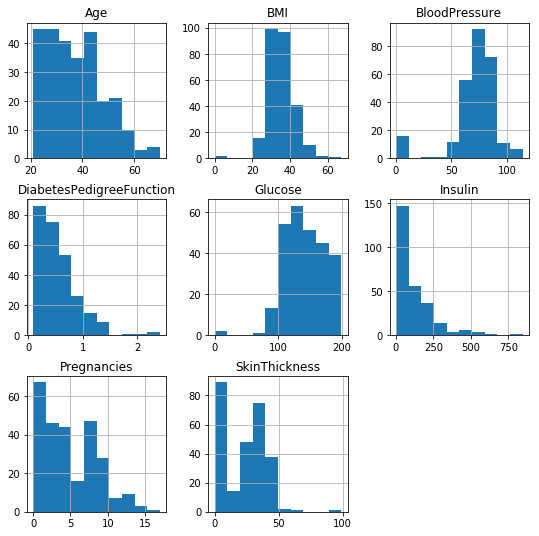

In [5]:
data.groupby('Outcome').hist(figsize=(9,9))

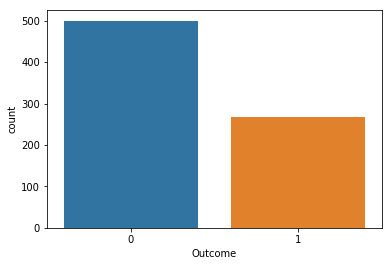

In [6]:
#Countplot
sb.countplot(x='Outcome',data=data)

In [7]:
x=data.iloc[:,0:8].values
y=data.iloc[:,8].values


In [8]:
x

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [9]:
y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [10]:
#Splitting the dataset into train and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [11]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [12]:
x_test

array([[-0.8354355 ,  2.45735903,  0.34674316, ...,  1.35224513,
         2.78594417, -0.96569189],
       [-0.54480808, -0.43719633,  0.24436264, ...,  0.17619533,
        -0.1876381 , -0.88240283],
       [ 0.03644676, -1.41253563, -0.36992051, ...,  0.22677812,
        -0.22668514, -0.71582471],
       ...,
       [ 0.03644676,  0.66399321,  0.85864578, ...,  1.4913478 ,
         0.53623395, -0.96569189],
       [-0.25418066, -0.15403331,  0.24436264, ..., -0.74694053,
        -1.07971278, -0.79911377],
       [-0.8354355 , -0.43719633,  0.14198211, ..., -0.17788417,
         1.06487079, -0.79911377]])

In [13]:
#import the keras libraries
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [14]:
#Initialising the ANN
classifier=Sequential()
#Adding the input and first hidden layer
classifier.add(Dense(units=6,kernel_initializer='uniform',activation='relu',input_dim=8))
#Adding the second hidden layer
classifier.add(Dense(units=6,kernel_initializer='uniform',activation='relu'))
#Adding the output layer
classifier.add(Dense(units=1,kernel_initializer='uniform',activation='sigmoid'))
#Compiling the ANN
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


Instructions for updating:
Colocations handled automatically by placer.


In [15]:
#Fitting the ANN to the training set
classifier.fit(x_train,y_train,batch_size=10,epochs=100)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
614/614 [==============================] - 4s 6ms/step - loss: 0.6883 - acc: 0.6401
Epoch 2/100
614/614 [==============================] - 0s 179us/step - loss: 0.6591 - acc: 0.6401
Epoch 3/100
614/614 [==============================] - 0s 182us/step - loss: 0.5940 - acc: 0.6401
Epoch 4/100
614/614 [==============================] - 0s 189us/step - loss: 0.5490 - acc: 0.6401
Epoch 5/100
614/614 [==============================] - 0s 203us/step - loss: 0.5337 - acc: 0.6401
Epoch 6/100
614/614 [==============================] - 0s 220us/step - loss: 0.5273 - acc: 0.6401
Epoch 7/100
614/614 [==============================] - 0s 215us/step - loss: 0.5226 - acc: 0.6401
Epoch 8/100
614/614 [==============================] - 0s 177us/step - loss: 0.5188 - acc: 0.6971
Epoch 9/100
614/614 [==============================] - 0s 173us/step - loss: 0.5166 - acc: 0.7655
Epoch 10/100
614/614 [==============================] - 0s 182us/step - 

In [16]:
y_pred=classifier.predict(x_test)
y_pred=(y_pred>0.5)

In [17]:
#Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy score:',accuracy_score(y_test,y_pred))

accuracy score: 0.7857142857142857


In [18]:
y_pred

array([[ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [